In [1]:
import seaborn as sns
import pandas as pd
from time import time

from src.data.problem import Problem

from src.solvers.random_solver import RandomSolver
from src.solvers.greedy_solver import GreedySolver

from src.utils import calculate_costs


In [2]:
# special structure for problem
example_problem = Problem.from_example()

In [3]:
dataset_data_params = [(1, 5, 10, 10), (2, 5, 10, 10), (3, 5, 10, 10), 
                       (1, 5, 5, 5), (2, 5, 5, 5), (3, 5, 5, 5),
                       (1, 10, 10, 10), (2, 10, 10, 10), (3, 10, 10, 10), 
                       (1, 5, 10, 20), (2, 5, 10, 20), (3, 5, 10, 20), 
                       (1, 5, 20, 10), (2, 5, 20, 10), (3, 5, 20, 10), 
                       (1, 5, 20, 20), (2, 5, 20, 20), (3, 5, 20, 20)]

### Random Solver

In [4]:
random_solver = RandomSolver()
start = time()
random_solution = random_solver.solve(example_problem)
run_time = time() - start
random_solution, run_time

({'Operation1': {'Subtask1': 'Stuttgart',
   'Subtask2': 'Frankfurt',
   'Subtask4': 'Berlin',
   'Subtask5': 'Stuttgart',
   'Subtask6': 'Berlin',
   'Subtask8': 'Hannover',
   'Subtask9': 'Munich',
   'Subtask10': 'Dresden'},
  'Operation2': {'Subtask1': 'Munich',
   'Subtask3': 'Hamburg',
   'Subtask4': 'Munich',
   'Subtask6': 'Erfurt',
   'Subtask7': 'Frankfurt',
   'Subtask9': 'Dusseldorf',
   'Subtask10': 'Munich'},
  'Operation3': {'Subtask1': 'Munich',
   'Subtask4': 'Dusseldorf',
   'Subtask5': 'Hamburg',
   'Subtask6': 'Stuttgart',
   'Subtask7': 'Hamburg',
   'Subtask8': 'Erfurt',
   'Subtask10': 'Munich'},
  'Operation4': {'Subtask1': 'Dresden',
   'Subtask2': 'Hamburg',
   'Subtask3': 'Bremen',
   'Subtask4': 'Dusseldorf',
   'Subtask8': 'Dresden',
   'Subtask9': 'Munich',
   'Subtask10': 'Frankfurt'},
  'Operation5': {'Subtask1': 'Munich',
   'Subtask2': 'Stuttgart',
   'Subtask3': 'Hannover',
   'Subtask4': 'Erfurt',
   'Subtask5': 'Berlin',
   'Subtask6': 'Bremen',
   

In [5]:
# calculate cost of solution
calculate_costs(example_problem, random_solution)

np.float64(18910.84054364048)

In [6]:
random_solution_stats = [calculate_costs(example_problem, random_solver.solve(example_problem)) for _ in range(1000)]

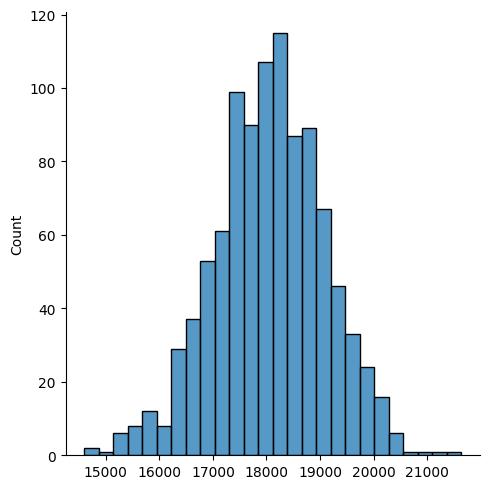

In [7]:
sns.displot(random_solution_stats);

In [8]:
solutions = {"example": {"cost": calculate_costs(example_problem, random_solution), "solution": random_solution, "time": run_time}}

In [9]:
for param in dataset_data_params:
    number, operations, sub_operations, cities = param
    p = Problem.from_dataset(number, operations, sub_operations, cities)
    start = time()
    random_solution = random_solver.solve(p)
    run_time = time() - start

    solutions[f"{operations},{sub_operations},{cities}-{number}"] = {"cost": calculate_costs(p, random_solution), 
                                                                     "solution": random_solution, 
                                                                     "time": run_time}

In [10]:
df_result = pd.DataFrame(solutions).T
df_result

,cost,solution,time
example,18910.840544,"{'Operation1': {'Subtask1': 'Stuttgart', 'Subt...",0.009024
"5,10,10-1",17917.017585,"{'Operation1': {'Sub-operation3': 'city6', 'Su...",0.003476
"5,10,10-2",20797.039931,"{'Operation1': {'Sub-operation1': 'city4', 'Su...",0.004157
"5,10,10-3",24747.931057,"{'Operation1': {'Sub-operation1': 'city9', 'Su...",0.004207
"5,5,5-1",6045.465804,"{'Operation1': {'Sub-operation3': 'city2', 'Su...",0.002476
"5,5,5-2",10514.52562,"{'Operation1': {'Sub-operation1': 'city3', 'Su...",0.002761
"5,5,5-3",13145.790132,"{'Operation1': {'Sub-operation1': 'city2', 'Su...",0.002406
"10,10,10-1",36951.255847,"{'Operation1': {'Sub-operation3': 'city7', 'Su...",0.007446
"10,10,10-2",50977.382707,"{'Operation1': {'Sub-operation1': 'city2', 'Su...",0.008165
"10,10,10-3",46564.324591,"{'Operation1': {'Sub-operation1': 'city10', 'S...",0.007519


In [11]:
df_result.to_csv("../data/solutions/random.csv", index=True)

### Greedy

In [12]:
greedy_solver = GreedySolver()
start = time()
greedy_solution = greedy_solver.solve(example_problem)
run_time = time() - start
greedy_solution, run_time

({'Operation1': {'Subtask1': 'Hannover',
   'Subtask2': 'Dresden',
   'Subtask4': 'Frankfurt',
   'Subtask5': 'Hamburg',
   'Subtask6': 'Berlin',
   'Subtask8': 'Munich',
   'Subtask9': 'Stuttgart',
   'Subtask10': 'Bremen'},
  'Operation2': {'Subtask1': 'Hannover',
   'Subtask3': 'Dresden',
   'Subtask4': 'Frankfurt',
   'Subtask6': 'Berlin',
   'Subtask7': 'Hannover',
   'Subtask9': 'Stuttgart',
   'Subtask10': 'Bremen'},
  'Operation3': {'Subtask1': 'Hannover',
   'Subtask4': 'Frankfurt',
   'Subtask5': 'Hamburg',
   'Subtask6': 'Berlin',
   'Subtask7': 'Hannover',
   'Subtask8': 'Munich',
   'Subtask10': 'Bremen'},
  'Operation4': {'Subtask1': 'Hannover',
   'Subtask2': 'Dresden',
   'Subtask3': 'Dresden',
   'Subtask4': 'Frankfurt',
   'Subtask8': 'Munich',
   'Subtask9': 'Stuttgart',
   'Subtask10': 'Bremen'},
  'Operation5': {'Subtask1': 'Hannover',
   'Subtask2': 'Dresden',
   'Subtask3': 'Dresden',
   'Subtask4': 'Frankfurt',
   'Subtask5': 'Hamburg',
   'Subtask6': 'Berlin',


In [13]:
calculate_costs(example_problem, greedy_solution)

np.float64(8783.34739008165)

In [14]:
solutions = {"example": {"cost": calculate_costs(example_problem, greedy_solution), "solution": greedy_solution, "time": run_time}}

In [15]:
for param in dataset_data_params:
    number, operations, sub_operations, cities = param
    p = Problem.from_dataset(number, operations, sub_operations, cities)
    start = time()
    greedy_solution = greedy_solver.solve(p)
    run_time = time() - start

    solutions[f"{operations},{sub_operations},{cities}-{number}"] = {"cost": calculate_costs(p, greedy_solution), 
                                                                     "solution": greedy_solution, 
                                                                     "time": run_time}

In [16]:
df_result = pd.DataFrame(solutions).T
df_result

,cost,solution,time
example,8783.34739,"{'Operation1': {'Subtask1': 'Hannover', 'Subta...",0.010307
"5,10,10-1",8256.400045,"{'Operation1': {'Sub-operation3': 'city1', 'Su...",0.004583
"5,10,10-2",12969.050248,"{'Operation1': {'Sub-operation1': 'city10', 'S...",0.005699
"5,10,10-3",12967.288599,"{'Operation1': {'Sub-operation1': 'city10', 'S...",0.006007
"5,5,5-1",5596.702327,"{'Operation1': {'Sub-operation3': 'city1', 'Su...",0.001737
"5,5,5-2",9469.346048,"{'Operation1': {'Sub-operation1': 'city2', 'Su...",0.002313
"5,5,5-3",10789.593007,"{'Operation1': {'Sub-operation1': 'city2', 'Su...",0.002713
"10,10,10-1",22489.14987,"{'Operation1': {'Sub-operation3': 'city1', 'Su...",0.009541
"10,10,10-2",24923.543409,"{'Operation1': {'Sub-operation1': 'city10', 'S...",0.011821
"10,10,10-3",23150.127166,"{'Operation1': {'Sub-operation1': 'city10', 'S...",0.013341


In [17]:
df_result.to_csv("../data/solutions/greedy.csv", index=True)